Exactitud del modelo: 1.00
Matriz de Confusión:
 [[1 0]
 [0 1]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



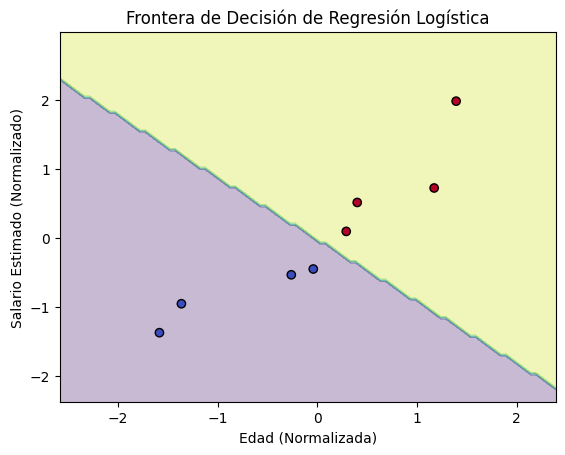

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Crear un DataFrame con los datos de ejemplo
data = pd.DataFrame({
    'Edad': [25, 45, 35, 50, 23, 40, 37, 48, 29, 41],
    'Salario': [50000, 80000, 60000, 120000, 40000, 75000, 62000, 90000, 58000, 85000],
    'Compró': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
})

# Separar características (X) y variable objetivo (y)
X = data[['Edad', 'Salario']]
y = data['Compró']

# Dividir datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar los datos para mejorar el desempeño del modelo
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear y entrenar el modelo
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Calcular precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud del modelo: {accuracy:.2f}')

# Matriz de confusión
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))

# Reporte de clasificación
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))

# Función para graficar la frontera de decisión
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
    plt.xlabel('Edad (Normalizada)')
    plt.ylabel('Salario Estimado (Normalizado)')
    plt.title('Frontera de Decisión de Regresión Logística')
    plt.show()

plot_decision_boundary(X_train, y_train, modelo)
